In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Set defualt setting for charts
from matplotlib import cycler
import matplotlib.pyplot as plt

colors = cycler('color',
               ['#EE6666', '#3388BB', '#9988DD',
                '#EECC55', '#88BB44', '#FFBBBB', '#CECCD2'])

plt.rcParams.update({
    'axes.facecolor': 'white',     
    'axes.edgecolor': 'none',
    'axes.axisbelow': True,
    'axes.grid': True,
    'axes.prop_cycle': colors,
    'grid.color': '#CECCD2',
    'grid.linestyle': '--',
    'grid.linewidth': 0.8,
    'xtick.direction': 'out',
    'xtick.color': 'gray',
    'ytick.direction': 'out',
    'ytick.color': 'gray',
    'patch.edgecolor': '#E6E6E6',
    'lines.linewidth': 2,
    'font.family': 'Times New Roman',
    'figure.autolayout': True

})

In [3]:
hr_df = pd.read_csv('HRDataset_v14.csv')

In [4]:
hr_df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
hr_df.shape

(311, 36)

In [6]:
hr_df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [7]:
#Identification of null values in each column
null_counts = hr_df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls

DateofTermination    207
ManagerID              8
dtype: int64

In [8]:
hr_df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [9]:
#Create clean dataframe with needed columns
hr_clean_df = hr_df[['Employee_Name', 'EmpID','Salary', 'Position', 'Sex', 'DateofHire', 'DateofTermination', 'EmploymentStatus', 'Department', 'EmpSatisfaction', 'SpecialProjectsCount', 'Absences' ,'ManagerName']]
hr_clean_df.head()

,Employee_Name,EmpID,Salary,Position,Sex,DateofHire,DateofTermination,EmploymentStatus,Department,EmpSatisfaction,SpecialProjectsCount,Absences,ManagerName
0,"Adinolfi, Wilson K",10026,62506,Production Technician I,M,7/5/2011,NaN,Active,Production,5,0,1,Michael Albert
1,"Ait Sidi, Karthikeyan",10084,104437,Sr. DBA,M,3/30/2015,6/16/2016,Voluntarily Terminated,IT/IS,3,6,17,Simon Roup
2,"Akinkuolie, Sarah",10196,64955,Production Technician II,F,7/5/2011,9/24/2012,Voluntarily Terminated,Production,3,0,3,Kissy Sullivan
3,"Alagbe,Trina",10088,64991,Production Technician I,F,1/7/2008,NaN,Active,Production,5,0,15,Elijiah Gray
4,"Anderson, Carol",10069,50825,Production Technician I,F,7/11/2011,9/6/2016,Voluntarily Terminated,Production,4,0,2,Webster Butler


In [10]:
#Identification of null values in each column in customize dataframe
null_counts = hr_clean_df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls

DateofTermination    207
dtype: int64

In [11]:
hr_clean_df['EmploymentStatus'].value_counts()

EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64

In [12]:
#All null values in DateofTermination column has active status so they are currently working
hr_clean_df = hr_clean_df.fillna('currently working')
hr_clean_df.head()

,Employee_Name,EmpID,Salary,Position,Sex,DateofHire,DateofTermination,EmploymentStatus,Department,EmpSatisfaction,SpecialProjectsCount,Absences,ManagerName
0,"Adinolfi, Wilson K",10026,62506,Production Technician I,M,7/5/2011,currently working,Active,Production,5,0,1,Michael Albert
1,"Ait Sidi, Karthikeyan",10084,104437,Sr. DBA,M,3/30/2015,6/16/2016,Voluntarily Terminated,IT/IS,3,6,17,Simon Roup
2,"Akinkuolie, Sarah",10196,64955,Production Technician II,F,7/5/2011,9/24/2012,Voluntarily Terminated,Production,3,0,3,Kissy Sullivan
3,"Alagbe,Trina",10088,64991,Production Technician I,F,1/7/2008,currently working,Active,Production,5,0,15,Elijiah Gray
4,"Anderson, Carol",10069,50825,Production Technician I,F,7/11/2011,9/6/2016,Voluntarily Terminated,Production,4,0,2,Webster Butler


In [13]:
hr_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Employee_Name         311 non-null    object
 1   EmpID                 311 non-null    int64 
 2   Salary                311 non-null    int64 
 3   Position              311 non-null    object
 4   Sex                   311 non-null    object
 5   DateofHire            311 non-null    object
 6   DateofTermination     311 non-null    object
 7   EmploymentStatus      311 non-null    object
 8   Department            311 non-null    object
 9   EmpSatisfaction       311 non-null    int64 
 10  SpecialProjectsCount  311 non-null    int64 
 11  Absences              311 non-null    int64 
 12  ManagerName           311 non-null    object
dtypes: int64(5), object(8)
memory usage: 31.7+ KB


In [14]:
hr_clean_df.describe()

,EmpID,Salary,EmpSatisfaction,SpecialProjectsCount,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,69020.684887,3.890675,1.218650,10.237942
std,89.922189,25156.636930,0.909241,2.349421,5.852596
min,10001.000000,45046.000000,1.000000,0.000000,1.000000
25%,10078.500000,55501.500000,3.000000,0.000000,5.000000
50%,10156.000000,62810.000000,4.000000,0.000000,10.000000
75%,10233.500000,72036.000000,5.000000,0.000000,15.000000
max,10311.000000,250000.000000,5.000000,8.000000,20.000000


In [15]:
#Removing spaces in Position column
hr_clean_df['Position'] = hr_clean_df['Position'].str.strip()  #Unnessecary space make some positions into two group

In [16]:
# hr_clean_df.to_csv('d:\\Trains\\seaborn\\hr_clean_df.csv', index= False)

At this stage, we have explore the dataset and ,where necessary, clean it to ensure the relevant data is readily accessible for further use. 

# Exercise 1

In [17]:
#Group salaries by every position and explore salary data
hr_clean_df.groupby('Position')['Salary'].agg(personel_count = 'count',
                                              average_salary = 'mean',
                                              min_salary = 'min',
                                              max_salary = 'max').sort_values(by = 'average_salary', ascending= False)

,personel_count,average_salary,min_salary,max_salary
Position,,,,
President & CEO,1,250000.000000,250000,250000
CIO,1,220450.000000,220450,220450
Director of Sales,1,180000.000000,180000,180000
IT Director,1,178000.000000,178000,178000
Director of Operations,1,170500.000000,170500,170500
IT Manager - Infra,1,157000.000000,157000,157000
Data Architect,1,150290.000000,150290,150290
IT Manager - DB,2,144959.500000,140920,148999
IT Manager - Support,1,138888.000000,138888,138888


In [18]:
iqr = np.subtract((np.percentile(hr_clean_df['Salary'], 75)), (np.percentile(hr_clean_df['Salary'], 25)))
lower_bound = hr_clean_df['Salary'].quantile(0.25) - 1.5 * iqr
upper_bound = hr_clean_df['Salary'].quantile(0.75) + 1.5 * iqr

In [19]:
outlier = hr_clean_df[(hr_clean_df['Salary'] > upper_bound) | (hr_clean_df['Salary'] < lower_bound)]

In [20]:
#Identification of which Positions has the most or the least salaries
outlier_salaries = (outlier.groupby('Position')['Salary']
                    .agg(number = 'count', salary = 'mean')
                    .sort_values('salary', ascending = False))
outlier_salaries

,number,salary
Position,,
President & CEO,1,250000.0
CIO,1,220450.0
Director of Sales,1,180000.0
IT Director,1,178000.0
Director of Operations,1,170500.0
IT Manager - Infra,1,157000.0
Data Architect,1,150290.0
IT Manager - DB,2,144959.5
IT Manager - Support,1,138888.0


The most identified outliers in the salary data related to managerial positions and are within the highest salary range. Additionally, no instance of salary below the normal threshold were observed. In fact, these values cannot be classified as outliers, as they do not result from unusual or erroneous entries. Rather, they reflect the typical salary difference between specialized or managarial positions and regular staff, this defferences are common and expected.

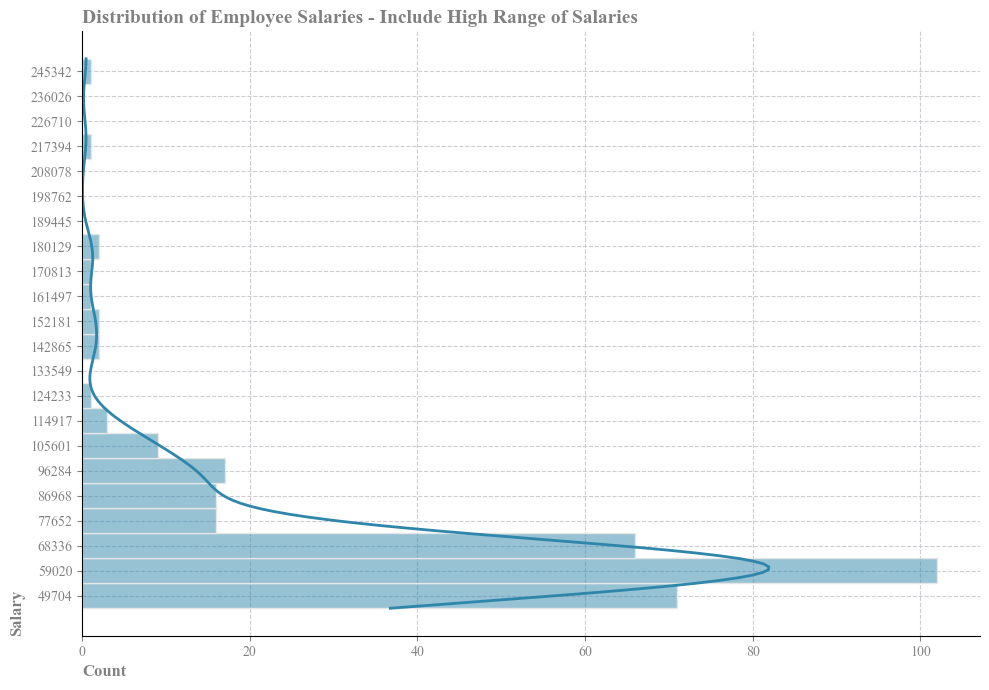

In [21]:
bins = np.histogram_bin_edges(hr_clean_df['Salary'], bins=22) #Bins with intervals of about 10,000 were used

fig, ax = plt.subplots(figsize= (10, 7))
sns.histplot(data = hr_clean_df, y = 'Salary',bins = bins, color= '#2E86AB', kde= True)

ax.set_yticks((bins[:-1] + bins[1:]) / 2)
ax.set_ylabel('Salary', loc='bottom', color='gray', weight = 'bold', fontsize = 12)
ax.set_xlabel('Count', loc='left', color='gray', weight = 'bold', fontsize = 12)
ax.set_title('Distribution of Employee Salaries - Include High Range of Salaries', loc = 'left', color = 'gray', weight = 'bold', fontsize = 14)
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('black');

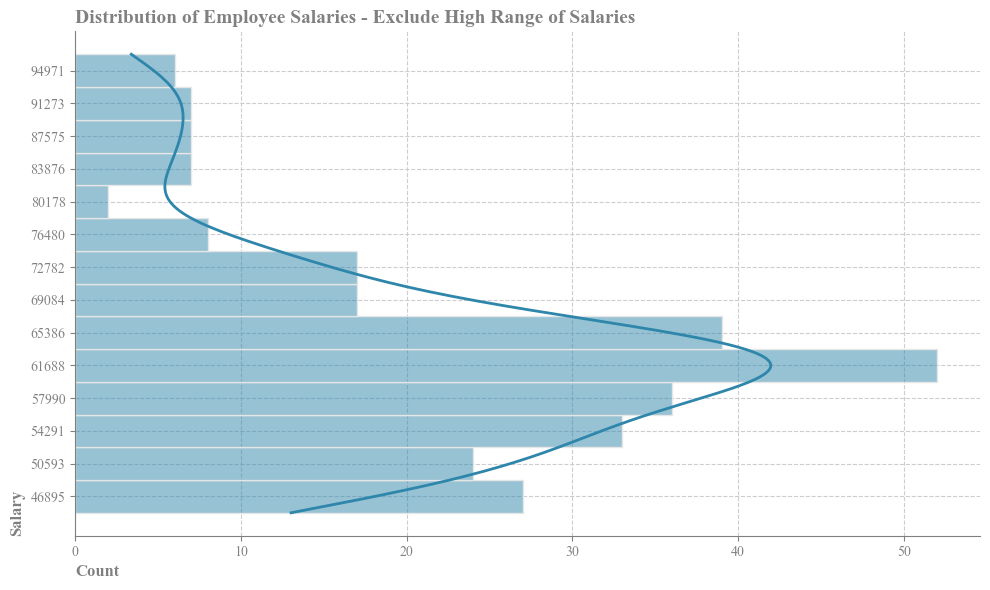

In [22]:
without_outlier = hr_clean_df[~(hr_clean_df['Salary'] > upper_bound) | (hr_clean_df['Salary'] < lower_bound)]
bins = np.histogram_bin_edges(without_outlier['Salary'], bins='auto')
bin_centers = (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots(figsize= (10, 6))
sns.histplot(data = without_outlier, y = 'Salary',bins = bins, color= '#2E86AB', kde= True)

ax.set_yticks(bin_centers)
ax.set_ylabel('Salary', loc='bottom', color='gray', weight = 'bold', fontsize = 12)
ax.set_xlabel('Count', loc='left', color='gray', weight = 'bold', fontsize = 12)
ax.set_title('Distribution of Employee Salaries - Exclude High Range of Salaries', loc = 'left', color = 'gray', weight = 'bold', fontsize = 14)
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('gray');

The analysis of income distribution reveals that employee salaries are predominantly concentrated within 45,000 to 70,000 range. A significant drop is observed in the 70,000 to 100,000 bracket, so most of salaries are dispreted around mean value. Salaries exceeding 100,000 are present but are primarily associated with managarial roles and a limit number of specialized positions. The salary distribution appears **right-skewed**, with most employees earning within a moderate range and a few outliers in higher salary brackets. The KDE curve highlights the **concentration around a central salary range**, indicating that while some high salaries exist, they are not representative of the general workforce.

# Exercise 2

In [23]:
average_absence = (hr_clean_df.groupby('Position')['Absences']
                   .agg(Average_Absence = 'mean', count_of_personel = 'count')
                   .sort_values('Average_Absence', ascending = False))
average_absence

,Average_Absence,count_of_personel
Position,,
Shared Services Manager,20.000000,1
Director of Sales,19.000000,1
Data Architect,17.000000,1
CIO,16.000000,1
IT Director,15.000000,1
Director of Operations,15.000000,1
IT Manager - Infra,13.000000,1
IT Support,12.375000,8
Senior BI Developer,12.000000,3


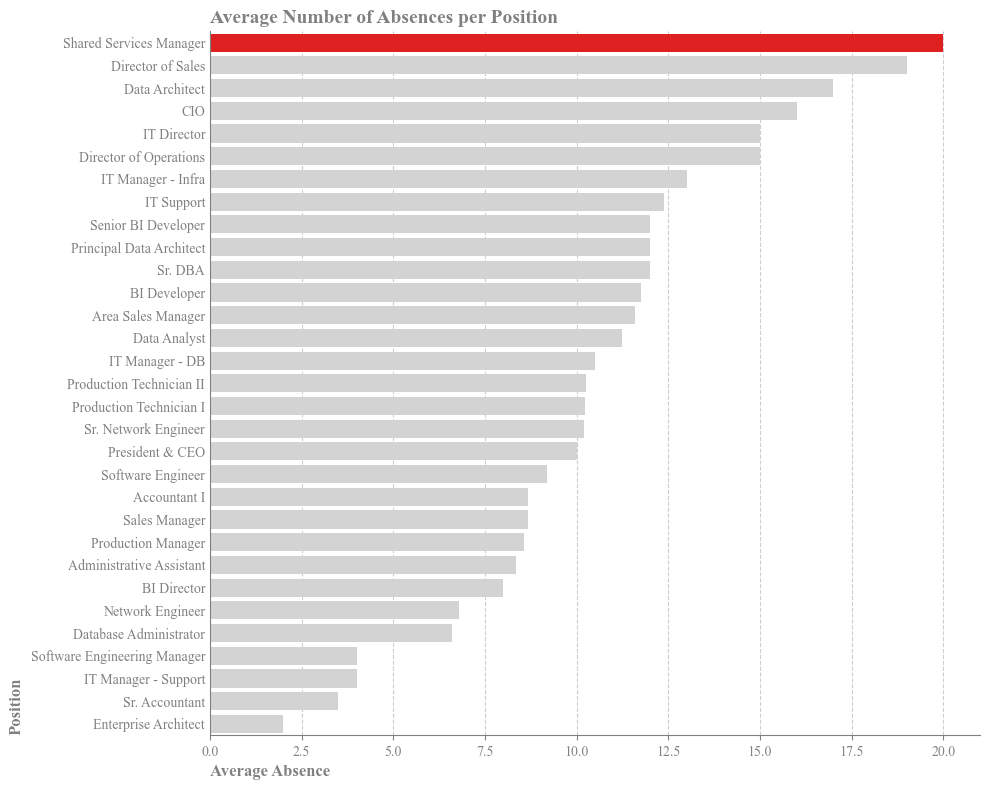

In [24]:
fig, ax = plt.subplots(figsize= (10, 8))
sns.barplot(data = average_absence, x= 'Average_Absence', y = 'Position', hue = 'Position', palette = list(np.where(average_absence['Average_Absence'] > 19, 'red', 'lightgray')))

ax.set_title('Average Number of Absences per Position', loc = 'left', color = 'gray', weight = 'bold', fontsize = 14)
ax.set_xlabel('Average Absence', loc='left', color='gray', weight = 'bold', fontsize = 12)
ax.set_ylabel('Position', loc='bottom', color='gray', weight = 'bold', fontsize = 12)
ax.tick_params(axis='y', which='both', length=0)
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('gray');

Senior-level positions tend to show higher average absences, possibly due to more flexible schedules or project-based work. The highest number of absences was recorded in the **shared Services Management** position, with 20 days.

# Exercise 3

In [25]:
#Create employment status within two group of active and terminated 
hr_clean_df['EmploymentStatus'] = np.where(hr_clean_df['EmploymentStatus'] != 'Active', 'Terminated', 'Active')

In [26]:
satisfacation_diff = hr_clean_df.groupby('EmploymentStatus', as_index= False)['EmpSatisfaction'].agg(average_satisfacation = 'mean',
                                                                                                     min_satisfacation = 'min',
                                                                                                     max_satisfacation = 'max',
                                                                                                     number_of_employee = 'count')
satisfacation_diff

,EmploymentStatus,average_satisfacation,min_satisfacation,max_satisfacation,number_of_employee
0,Active,3.893720,1,5,207
1,Terminated,3.884615,2,5,104


C:\Users\ASUS\AppData\Local\Temp\ipykernel_71124\404718517.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')


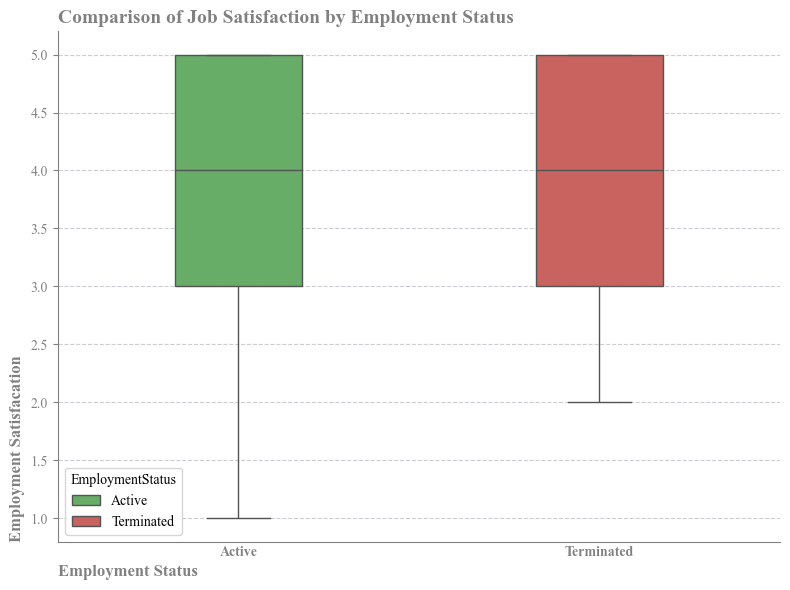

In [27]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.boxplot(data= hr_clean_df,x = 'EmploymentStatus',y = 'EmpSatisfaction', hue = 'EmploymentStatus',palette = ['#5CB85C', '#D9534F'], width= 0.35, legend= True)

ax.set_xlabel('Employment Status', loc= 'left', color = 'gray' , weight = 'bold', fontsize = 12)
ax.set_ylabel('Employment Satisfacation', loc= 'bottom', color = 'gray' , weight = 'bold', fontsize = 12)
ax.set_title('Comparison of Job Satisfaction by Employment Status', loc = 'left', weight = 'bold', fontsize = 14, color = 'gray')
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('gray')
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
ax.tick_params(axis='x', which='both', length=0);

Out of 311 employees, **66% are still actively** working in the company, while **34% have been terminated**. The average satisfaction level for both groups is **3.8**, which is considered acceptable. Among the current employees, some have reported a satisfaction score of 1, whereas the terminated employees generally reported satisfaction levels above the minimum. Most individuals in both groups have satisfaction scores ranging between 3 and 5, closely clustering around the mean value of 3.8. This reflects a stable organizational climate and a generally positive level of employee job satisfaction.

# Exercise 4

In [28]:
#Extract years of hiring
hr_clean_df['DateofHire'] = pd.to_datetime(hr_clean_df['DateofHire'])
hr_clean_df['years_of_hiring'] = hr_clean_df['DateofHire'].dt.year

In [29]:
#Number of yearly hiring
years_of_hiring = (hr_clean_df.groupby('years_of_hiring')['Department'].agg(counts = 'count').sort_values('counts', ascending= False))
years_of_hiring

,counts
years_of_hiring,
2011,83
2014,60
2012,45
2013,44
2015,36
2016,14
2010,9
2009,7
2017,6


In [30]:
#Number of hires by department and years
departeman_hiring = hr_clean_df.pivot_table(
                                            index = 'Department',
                                            columns= 'years_of_hiring',
                                            values= 'EmpID',
                                            aggfunc= 'count',
                                            fill_value= 0
)
departeman_hiring

years_of_hiring,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Department,,,,,,,,,,,,,
Admin Offices,0,0,1,1,0,1,0,0,2,3,1,0,0
Executive Office,0,0,0,0,0,0,1,0,0,0,0,0,0
IT/IS,0,0,0,0,2,3,3,1,10,20,5,6,0
Production,0,2,2,6,6,69,33,37,35,11,7,0,1
Sales,1,0,0,0,1,6,6,3,11,2,1,0,0
Software Engineering,0,0,0,0,0,4,2,3,2,0,0,0,0


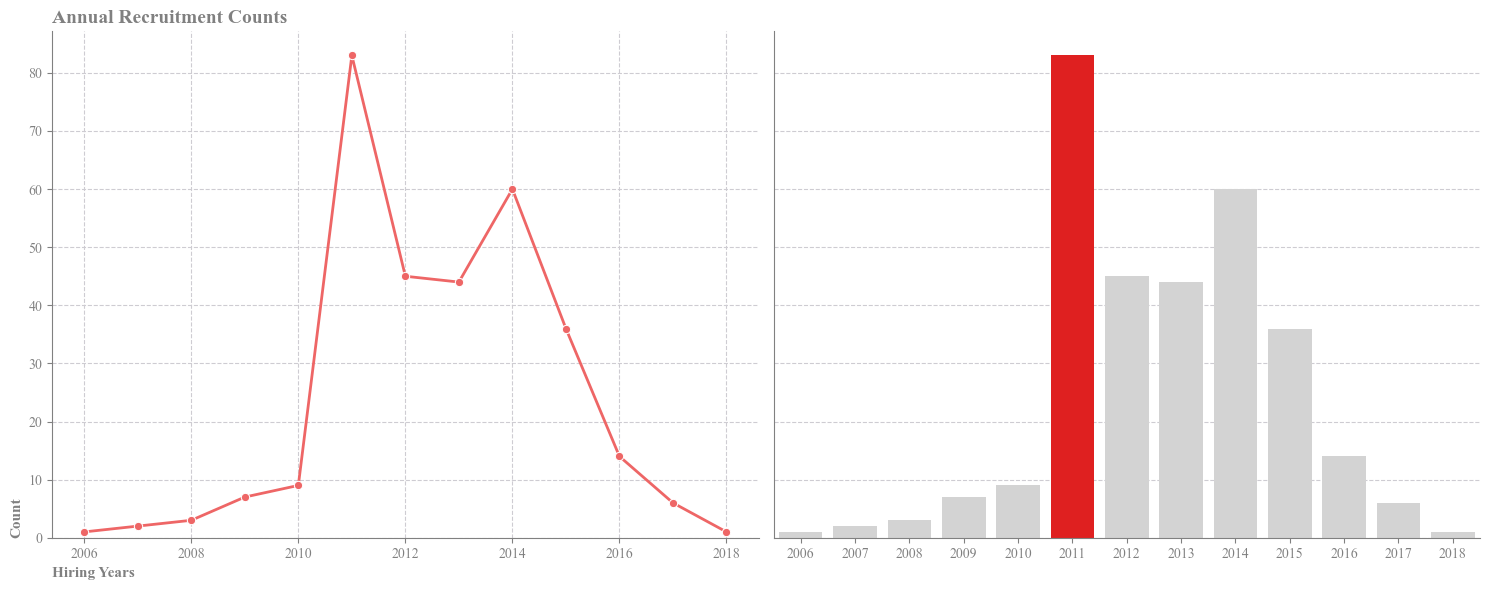

In [31]:
fig, ax = plt.subplots(1, 2, figsize= (15, 6), sharey = True)

sns.lineplot(data = years_of_hiring, x = 'years_of_hiring', y = 'counts', marker= 'o', ax = ax[0])
ax[0].set_title('Annual Recruitment Counts', loc = 'left', color = 'gray', weight = 'bold', fontsize = 14)
ax[0].set_xlabel('Hiring Years', loc = 'left', weight = 'bold', fontsize = 11, color = 'gray')
ax[0].set_ylabel('Count', loc = 'bottom', color = 'gray', weight = 'bold', fontsize = 11)
ax[0].spines[['bottom', 'left']].set_visible(True)
ax[0].spines[['bottom', 'left']].set_color('gray')

years_of_hiring['color'] = np.where(years_of_hiring['counts'] > 70, 'red', 'lightgray')
sns.barplot(data = years_of_hiring, x = 'years_of_hiring', y = 'counts',palette = {'red': 'red', 'lightgray': 'lightgray'}, hue = 'color', legend= False, ax = ax[1])
ax[1].set_xlabel('')
ax[1].tick_params(axis = 'y', which = 'both', length = 0)
ax[1].spines[['bottom', 'left']].set_visible(True)
ax[1].spines[['bottom', 'left']].set_color('gray')
plt.tight_layout();


In [32]:
#Identification of relation between hiring and special projects
corr_hiring_proj = np.corrcoef(hr_clean_df['years_of_hiring'], hr_clean_df['SpecialProjectsCount'])
corr_hiring_proj

array([[1.        , 0.38400123],
       [0.38400123, 1.        ]])

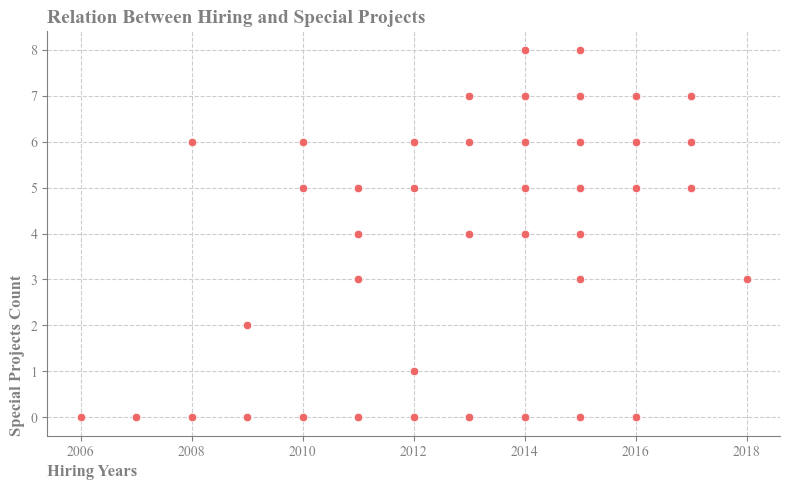

In [33]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.scatterplot(data = hr_clean_df, x = 'years_of_hiring', y = 'SpecialProjectsCount')

ax.set_title('Relation Between Hiring and Special Projects', loc = 'left', color = 'gray', weight = 'bold', fontsize = 14)
ax.set_xlabel('Hiring Years', loc = 'left', weight = 'bold', fontsize = 12, color = 'gray')
ax.set_ylabel('Special Projects Count', loc = 'bottom', color = 'gray', weight = 'bold', fontsize = 12)
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('gray')

Recruitment began to increase between 2006 and 2010 and experienced a significant surge from **2011 to 2014**, followed by a decline in the subsequent years. During this period, the **Production department** recorded the highest recruitment rate compared to other departments. Given that the number of Special Projects also rose considerably starting in 2011, it can be inferred that the Production department required additional personnel to carry out these projects. Therefore, the sharp increase in recruitment during the mentioned years—particularly within the Production department—was likely driven by the rise in Special Projects.

# Exercise 5

In [34]:
absence_count_per_proj = (hr_clean_df.groupby('SpecialProjectsCount', as_index= False)['Absences']
                                                                                                .agg(counts = 'count')
                                                                                                .sort_values('SpecialProjectsCount', ascending= False))
absence_count_per_proj

,SpecialProjectsCount,counts
8,8,2
7,7,12
6,6,21
5,5,21
4,4,9
3,3,3
2,2,1
1,1,1
0,0,241


In [35]:
#Identification of number of absences per department
departeman_absence = hr_clean_df.pivot_table(
                                            index = 'Department',
                                            columns= 'SpecialProjectsCount',
                                            values= 'Absences',
                                            aggfunc= 'count',
                                            fill_value= 0)
departeman_absence

SpecialProjectsCount,0,1,2,3,4,5,6,7,8
Department,,,,,,,,,
Admin Offices,1,0,1,1,3,2,1,0,0
Executive Office,1,0,0,0,0,0,0,0,0
IT/IS,0,0,0,0,2,16,18,12,2
Production,207,1,0,1,0,0,0,0,0
Sales,31,0,0,0,0,0,0,0,0
Software Engineering,1,0,0,1,4,3,2,0,0


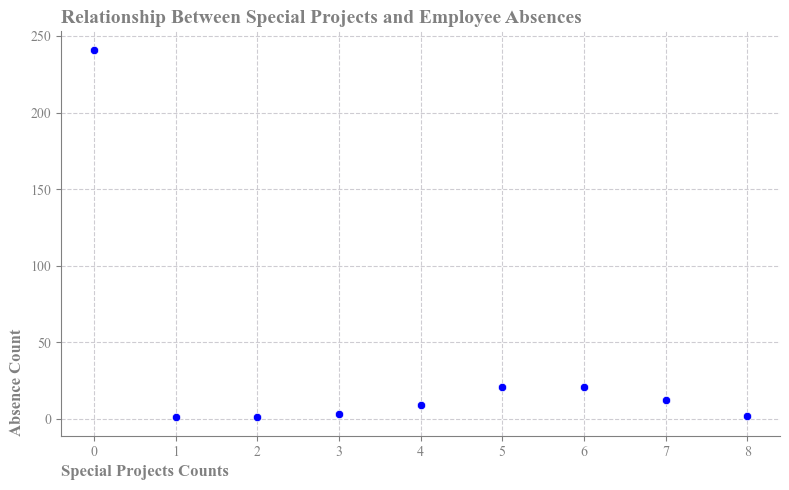

In [36]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.scatterplot(data = absence_count_per_proj, x = 'SpecialProjectsCount', y = 'counts', color = 'blue')

ax.set_title('Relationship Between Special Projects and Employee Absences', loc = 'left', color = 'gray', weight = 'bold', fontsize = 14)
ax.set_xlabel('Special Projects Counts', loc = 'left', color = 'gray', weight = 'bold', fontsize = 12)
ax.set_ylabel('Absence Count', loc = 'bottom', color = 'gray', weight = 'bold', fontsize = 12)
ax.spines[['bottom', 'left']].set_visible(True)
ax.spines[['bottom', 'left']].set_color('gray')

In [37]:
#Identification of relation between absence and special project count
corr_absence_proj = np.corrcoef(hr_clean_df['Absences'], hr_clean_df['SpecialProjectsCount'])
corr_absence_proj

array([[ 1.        , -0.02045248],
       [-0.02045248,  1.        ]])

An some how **inverse relationship** was observed between the number of Special Projects and the rate of employee absences: as the number of Special Projects increased, the absence rate declined significantly. Specifically, **68% of all absences** occurred during periods when no Special Projects were active, whereas the presence of such projects was associated with a notable decrease in absences. When the number of Special Projects increased, the absence rate remained consistently low, ranging between 4% and 7%.
A departmental analysis revealed that during periods when Special Projects were available, the **Production** department reported zero absences, while the highest absence rate was recorded in the IT/IS department. This pattern may be interpreted as follows: with Special Projects underway, the Production department required full staffing to meet project demands, thereby reducing absences to zero and permitting leave only during periods with no active projects. Consequently, the absence rate within the Production department increased sharply when no projects were in progress.